In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people

In [3]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

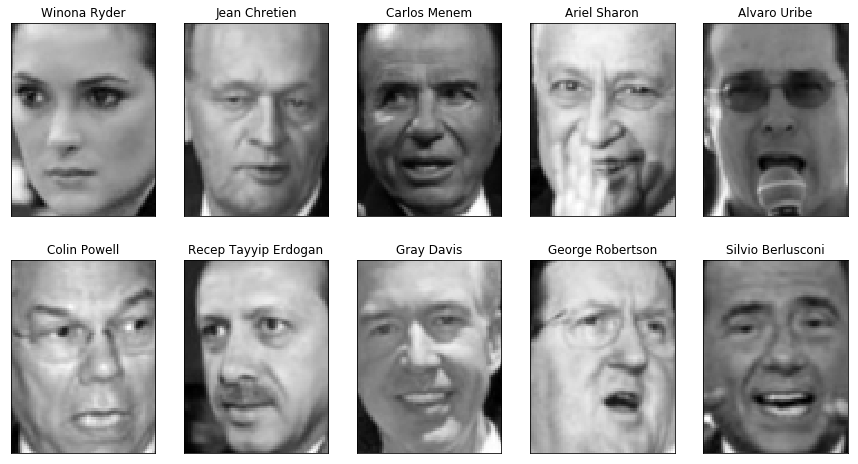

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gist_gray)
    ax.set_title(people.target_names[target])
plt.show()    

In [8]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [9]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [11]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

In [15]:
print(X_people.shape)
print(y_people.shape)

(2063, 5655)
(2063,)


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_people)
X_people_pca = pca.transform(X_people)

print("X_people_pca.shape: {}".format(X_people_pca.shape))

X_people_pca.shape: (2063, 100)


In [20]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


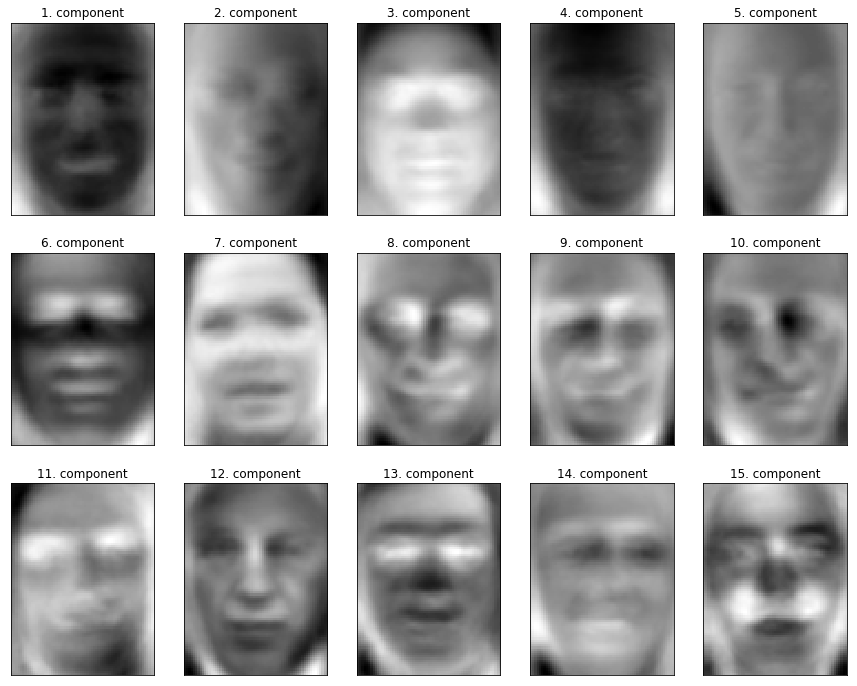

In [25]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap=plt.cm.gist_gray)
#               cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))
plt.show()    

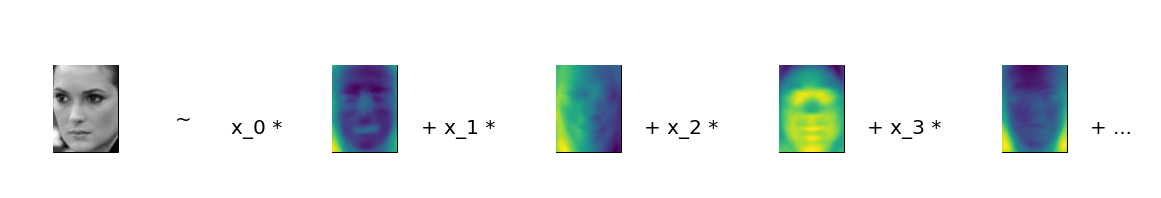

In [40]:
# FIXME hide this!
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape),cmap="viridis")

    ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),
                        pad=0.0,
                        xycoords='data'
                        )
    ax.add_artist(ab)
    if i == 0:
        plt.text(.18, .25, 'x_{} *'.format(i), fontdict={'fontsize': 20})
    else:
        plt.text(.15 + .2 * i, .25, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 20})

plt.text(.95, .25, '+ ...', fontdict={'fontsize': 20})

plt.text(.13, .3, r'~', fontdict={'fontsize': 20})
plt.axis("off")
plt.show()

In [37]:
reduced_images = []
for n_components in [10, 50, 100, 500]:
    # build the NMF model
    pca_temp = PCA(n_components=n_components)
    pca_temp.fit(X_people)
    # transform the test data (afterwards has n_components many dimensions)
    X_test_pca = pca_temp.transform(X_people)
    # back-transform the transformed test-data
    # (afterwards it's in the original space again)
    X_test_back = pca_temp.inverse_transform(X_test_pca)
    reduced_images.append(X_test_back)

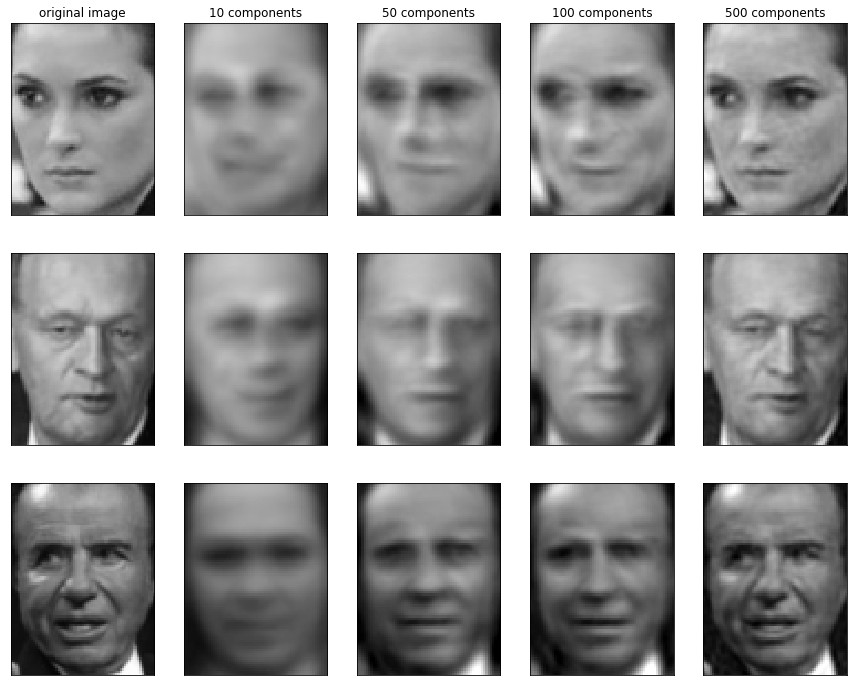

In [44]:
# plot the first three images in the test set:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, ax in enumerate(axes):
    # plot original image
    ax[0].imshow(X_people[i].reshape(image_shape),
                 vmin=0, vmax=1, cmap=plt.cm.gist_gray)
    # plot the four back-transformed images
    for a, X_test_back in zip(ax[1:], reduced_images):
        a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1, cmap=plt.cm.gist_gray)

# label the top row
axes[0, 0].set_title("original image")
for ax, n_components in zip(axes[0, 1:], [10, 50, 100, 500]):
    ax.set_title("%d components" % n_components)
plt.show()    

In [45]:
len(X_people)

2063

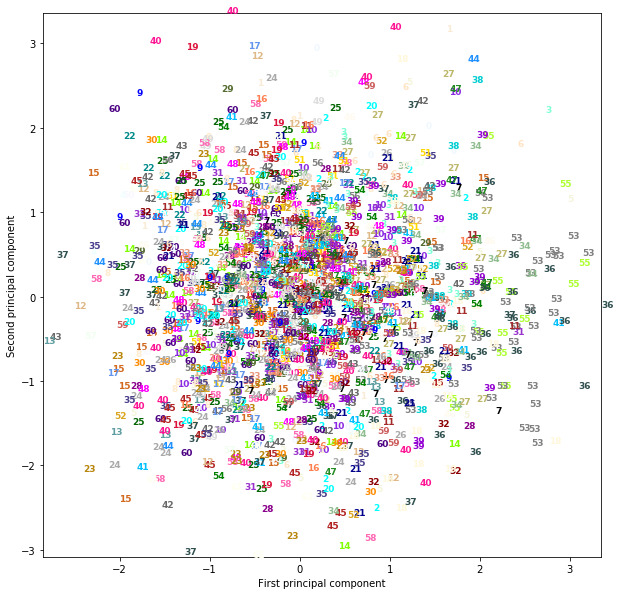

In [60]:
# build a PCA model
pca_2 = PCA(n_components=2)
pca_2.fit(X_people)
# transform the digits data onto the first two principal components
X_people_pca_2 = pca.transform(X_people)
from matplotlib import colors as mcolors

colors = list(mcolors.CSS4_COLORS)
plt.figure(figsize=(10, 10))
plt.xlim(X_people_pca_2[:, 0].min(), X_people_pca_2[:, 0].max())
plt.ylim(X_people_pca_2[:, 1].min(), X_people_pca_2[:, 1].max())
for i in range(len(X_people)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_people_pca_2[i, 0], X_people_pca_2[i, 1], str(y_people[i]),
             color = colors[y_people[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

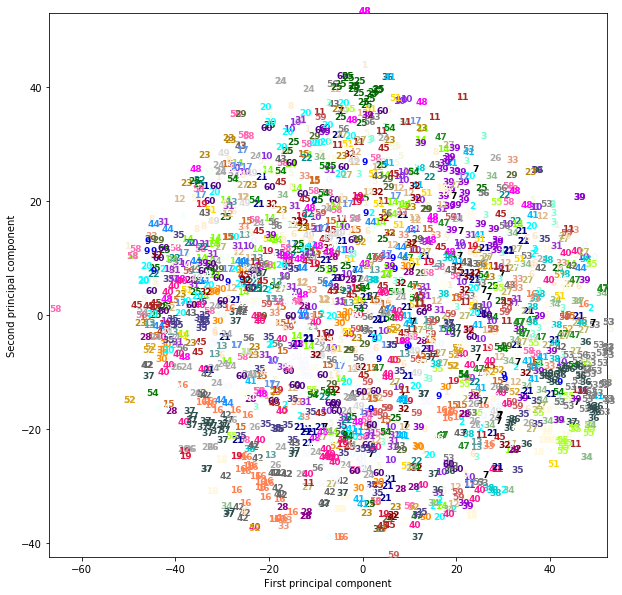

In [61]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_people_tsne = tsne.fit_transform(X_people)

from matplotlib import colors as mcolors

colors = list(mcolors.CSS4_COLORS)
plt.figure(figsize=(10, 10))
plt.xlim(X_people_tsne[:, 0].min(), X_people_tsne[:, 0].max())
plt.ylim(X_people_tsne[:, 1].min(), X_people_tsne[:, 1].max())
for i in range(len(X_people)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_people_tsne[i, 0], X_people_tsne[i, 1], str(y_people[i]),
             color = colors[y_people[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()